<a href="https://colab.research.google.com/github/tomishing/python_data_science_basics/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Nearest Neighbour

- kNN (k-Nearest Neighbors) is a simple, non-parametric machine learning algorithm used for classification and regression.
- It stores the training data.
- To predict for a new data point, it:
- Finds the k closest data points (neighbors) in the training set.
- Votes (for classification) or averages (for regression) their values to make a prediction.
- Ma

#### Pros and Cons:
- Easy to understand
- No training time
- Slow with large data
- Sensitive to feature scaling

## kNN is often used in GIS (Geographic Information Systems) for tasks like:

### Examples in GIS:
- Spatial interpolation (e.g., estimating temperature, rainfall at unknown locations)
- Land use classification from satellite images
- Predicting soil types or vegetation cover based on nearby samples
- Recommending nearby points of interest (e.g., restaurants, ATMs)
- Since GIS data is spatial, kNN works well because it’s based on the idea that “nearby things are more related than distant things” — also known as Tobler’s First Law of Geography.



## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Data loading

In [2]:
filename = "Dry_Bean.csv"
try:
  df = pd.read_csv(filename)
  print("Dataset loaded successfully")
except FileNotFoundError:
  print(f'Error: {filename} not found. Please check the file path.')

Dataset loaded successfully


In [3]:
df.head(2)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER


## 1. make X and y, then split them into training and testing data sets

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11380,30210,651.194,254.800257,151.387457,1.683100,0.804360,30507,196.123855,0.788608,0.990265,0.895241,0.769716,0.008434,0.001826,0.592463,0.997174
10592,26989,603.446,209.236366,164.968662,1.268340,0.615122,27389,185.373844,0.724887,0.985396,0.931365,0.885954,0.007753,0.002946,0.784915,0.995539
3130,79508,1120.351,410.471774,248.306459,1.653085,0.796279,80728,318.170913,0.706889,0.984888,0.795999,0.775135,0.005163,0.001150,0.600834,0.993230
5861,47394,880.106,365.540272,165.751428,2.205352,0.891286,48081,245.649985,0.624921,0.985712,0.768888,0.672019,0.007713,0.000970,0.451609,0.995958
3405,145339,1465.758,543.258451,342.468755,1.586301,0.776273,147256,430.175967,0.695958,0.986982,0.850095,0.791844,0.003738,0.000906,0.627017,0.994638


## 2. Standerize X matrix

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
print(X_test_scaled)
print(f'\n{X_test_scaled_df.head()}')

[[-0.36505011 -0.5321869  -0.69889925 ...  1.15604363  1.54829682
   0.98358711]
 [ 0.51874464  1.08844183  0.5841559  ... -0.62429357 -0.09900143
  -1.98121428]
 [-0.51797785 -0.68379091 -0.83596414 ...  1.26625327  1.39387519
   0.72236442]
 ...
 [ 0.01820734  0.33833539  0.67047565 ... -1.21156159 -1.67299356
  -0.47980547]
 [-0.48277343 -0.67091553 -0.87798451 ...  1.57041514  1.85044816
   0.92733484]
 [ 0.04058534  0.39830081  0.20696105 ... -0.52132588 -0.3926362
   0.44430695]]

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.365050  -0.532187        -0.698899         0.114115     -1.334541   
1  0.518745   1.088442         0.584156         0.795151     -0.109182   
2 -0.517978  -0.683791        -0.835964        -0.174416     -1.240986   
3 -0.678752  -0.965133        -1.137649        -0.277448     -1.668693   
4 -0.788527  -0.968933        -0.960769        -0.917814     -0.436385   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity 

## 3. Model Training

In [6]:
# Initialize and train the kNN model

# k = 3
knn3 = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn3.fit(X_train_scaled, y_train)

# k = 5
knn5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn5.fit(X_train_scaled, y_train)


KNeighborsClassifier(metric='euclidean')

## 4. Model prediction

In [7]:
# 4. Model prediction
y_pred3 = knn3.predict(X_test_scaled)
y_pred5 = knn5.predict(X_test_scaled)


## 5. Model Evaluation

In [8]:
# 5. Model Evaluation
accuracy3 = accuracy_score(y_test, y_pred3)
accuracy5 = accuracy_score(y_test, y_pred5)

print(f"Accuracy for k=3: {accuracy3:.4f}")
print(f"Accuracy for k=5: {accuracy5:.4f}")

## 5.1 detailed report about the predictions
print("\nClassification Report for k=3:")
print(classification_report(y_test, y_pred3))

print("\nClassification Report for k=5:")
print(classification_report(y_test, y_pred5))


Accuracy for k=3: 0.9153
Accuracy for k=5: 0.9216

Classification Report for k=3:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.88      0.90       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.91      0.95      0.93       479
    DERMASON       0.89      0.91      0.90      1043
       HOROZ       0.97      0.95      0.96       588
       SEKER       0.95      0.94      0.94       619
        SIRA       0.86      0.86      0.86       799

    accuracy                           0.92      4084
   macro avg       0.93      0.93      0.93      4084
weighted avg       0.92      0.92      0.92      4084


Classification Report for k=5:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.91      0.93       395
      BOMBAY       1.00      1.00      1.00       161
        CALI       0.92      0.94      0.93       479
    DERMASON       0.90      0.91      0.91      1043
       HOROZ      

## 6. Confusion matrix and its visualization

--- k = 3 --- 
[[348   0  35   0   0   3   9]
 [  0 161   0   0   0   0   0]
 [ 14   0 453   0   6   1   5]
 [  1   0   0 951   2  19  70]
 [  3   0   9   3 558   0  15]
 [  6   0   1  20   0 580  12]
 [  4   0   2  91   8   7 687]]

--- k = 5 --- 
[[358   0  24   0   1   3   9]
 [  0 161   0   0   0   0   0]
 [ 12   0 451   0  10   2   4]
 [  0   0   0 951   1  20  71]
 [  1   0  12   5 556   0  14]
 [  4   0   0  13   0 590  12]
 [  3   0   1  85   5   8 697]]



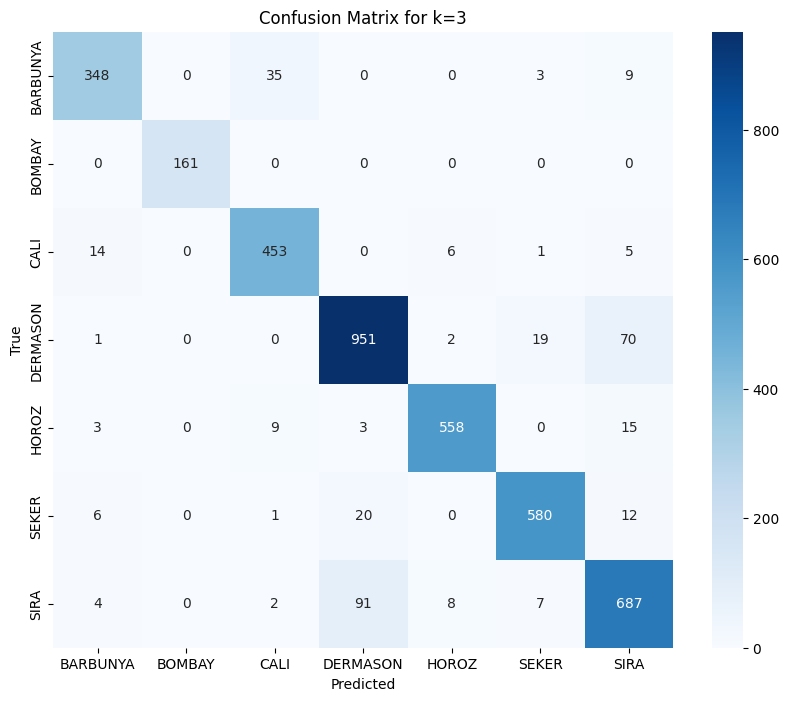

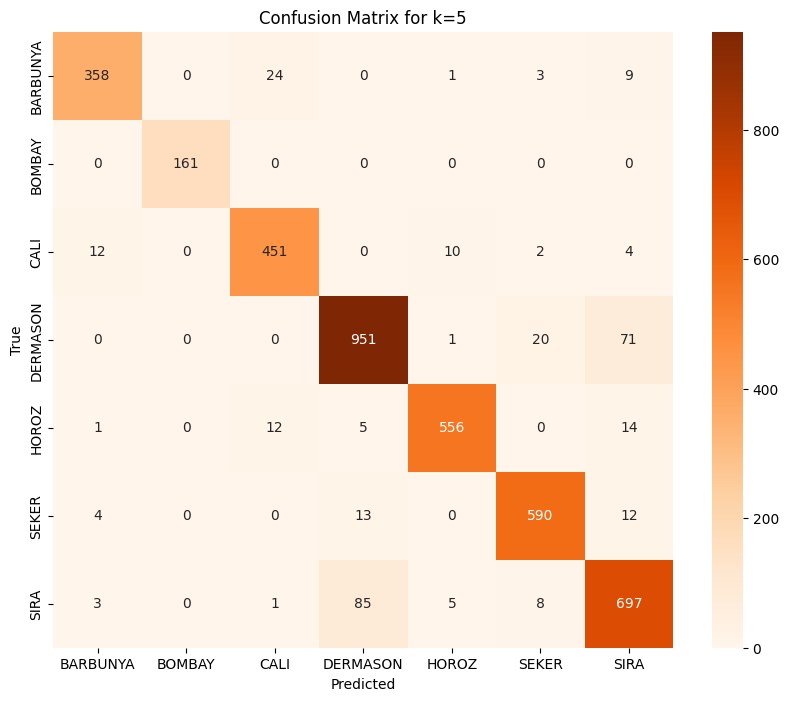

In [ ]:
class_names = knn3.classes_

## k = 3
cm3 = confusion_matrix(y_test, y_pred3)
print("--- k = 3 --- ")
print(f'{cm3}\n')
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for k=3')
plt.xlabel('Predicted')
plt.ylabel('True')

## k = 5
cm5 = confusion_matrix(y_test, y_pred5)
print("--- k = 5 --- ")
print(f'{cm5}\n')
plt.figure(figsize=(10, 8))
sns.heatmap(cm5, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for k=5')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### How to interpret if n > 2?

exp)

|              | Pred A | Pred B | Pred C | Pred D |
| ------------ | ------ | ------ | ------ | ------ |
| **Actual A** | 40     | 2      | 1      | 0      |
| **Actual B** | 3      | 35     | 4      | 1      |
| **Actual C** | 0      | 2      | 30     | 5      |
| **Actual D** | 1      | 0      | 3      | 25     |


- Diagonal cells = correct predictions.

  - E.g., 40 samples of class A correctly predicted as A.

- Off-diagonal cells = misclassifications.

  - E.g., 3 samples of class B wrongly predicted as A.